In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/combined_for_analysis_sensationalism_jargon_categories_domain_labels.csv")
df["log_score"] = np.log(df["score"] + 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197787 entries, 0 to 197786
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  197787 non-null  int64  
 1   year                        197787 non-null  int64  
 2   month                       197787 non-null  int64  
 3   title                       197787 non-null  object 
 4   link_flair_text             197787 non-null  object 
 5   domain                      197787 non-null  object 
 6   score                       197787 non-null  int64  
 7   num_comments                197787 non-null  int64  
 8   sensationalism_score        197787 non-null  float64
 9   jargon_proportion           197622 non-null  float64
 10  is_top_domain_social_media  197787 non-null  bool   
 11  is_top_domain_scientific    197787 non-null  bool   
 12  is_top_domain_news          197787 non-null  bool   
 13  is_top_domain_

In [2]:
domain_order_for_hue = ["repo", "scientific", "news", "social_media", "scam"]
selected_categories = ["Medicine", "Engineering", "Economics", "Social Science", "Computer Science", "Epidemiology"]
top_categories_order = ["Life Sciences", "Social Sciences", "Environmental Sciences", "Engineering & Technology", "Physical Sciences"]


# Sensationalism over different domains and categories


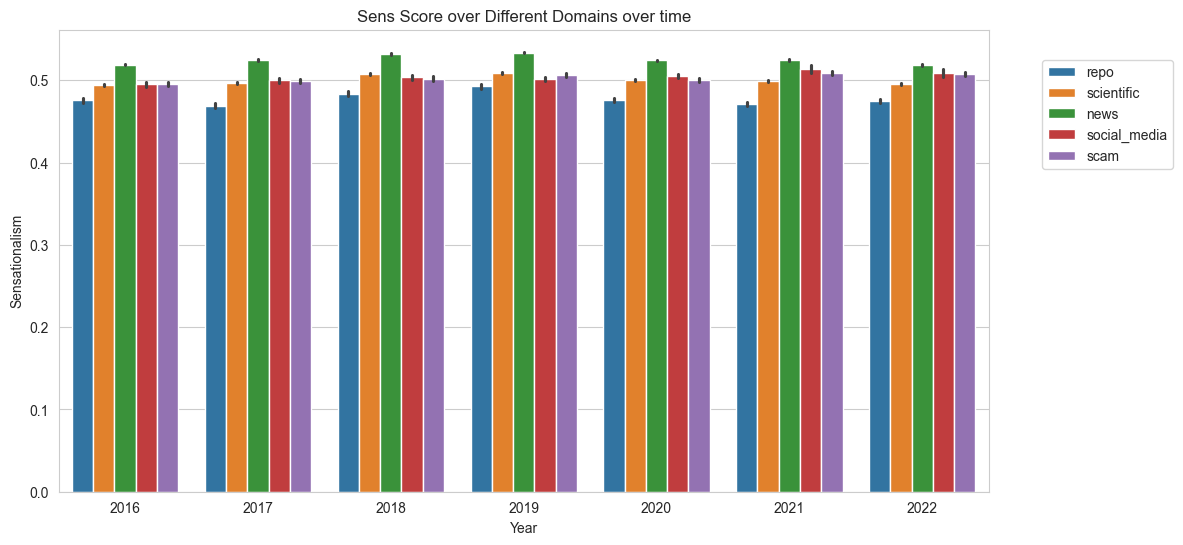

In [3]:
plt.figure(figsize=(12, 6))

sns_plot = sns.barplot(data=df, x = "year", y = "sensationalism_score", hue="label_voting_manual", hue_order=domain_order_for_hue)
plt.title("Sens Score over Different Domains over time")
plt.xlabel("Year")
plt.ylabel("Sensationalism")
plt.legend(title="Domain Category", loc="upper right", handles = sns_plot.get_legend_handles_labels()[0] + [plt.Line2D([], [], color="black", label="Confidence Interval (99%)")])
plt.legend(bbox_to_anchor=(1.05, .95), loc='upper left')
# plt.yscale('log') # TODO: Discuss use of log scale
plt.show()

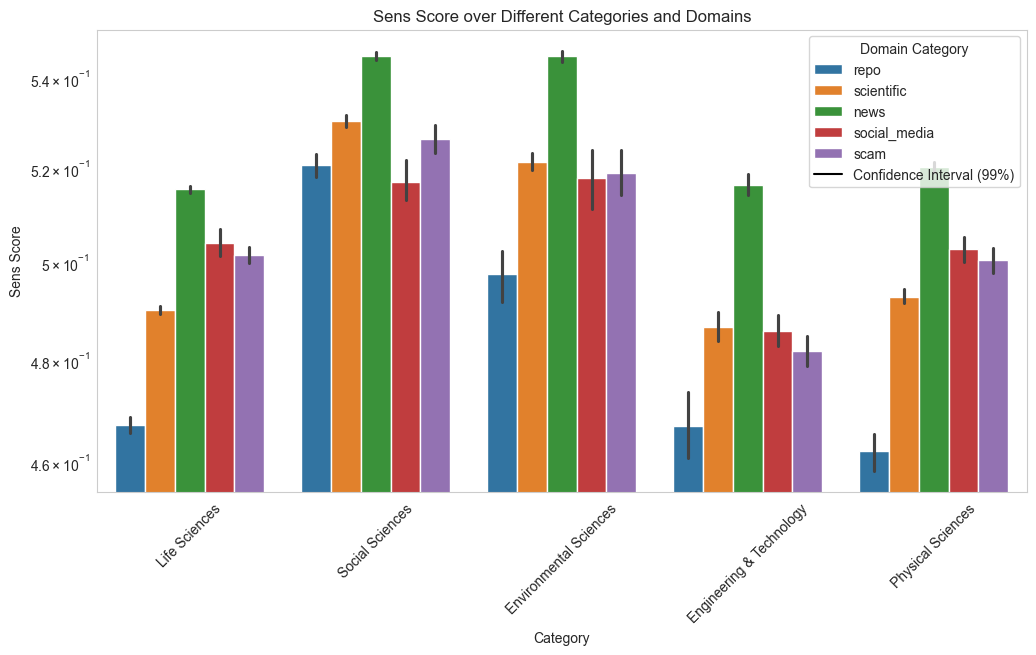

In [4]:
plt.figure(figsize=(12, 6))
sns_plot = sns.barplot(data=df, x="top_category", y="sensationalism_score", hue="label_voting_manual",  hue_order=["repo", "scientific", "news", "social_media", "scam"], order=top_categories_order, errorbar=("ci", 99))
plt.xticks(rotation=45)
handles = sns_plot.get_legend_handles_labels()
# add error bars for the 50th percentile to the legend
plt.legend(title="Domain Category", loc="upper right", handles = handles[0] + [plt.Line2D([], [], color="black", label="Confidence Interval (99%)")])
plt.title("Sens Score over Different Categories and Domains")
plt.xlabel("Category")
plt.ylabel("Sens Score")
plt.yscale('log')
plt.show()


News generally have more sensationalism than other domains. We also see that social sciences and environmental sciences have more sensationsalism than engieneering & technology and physical sciences

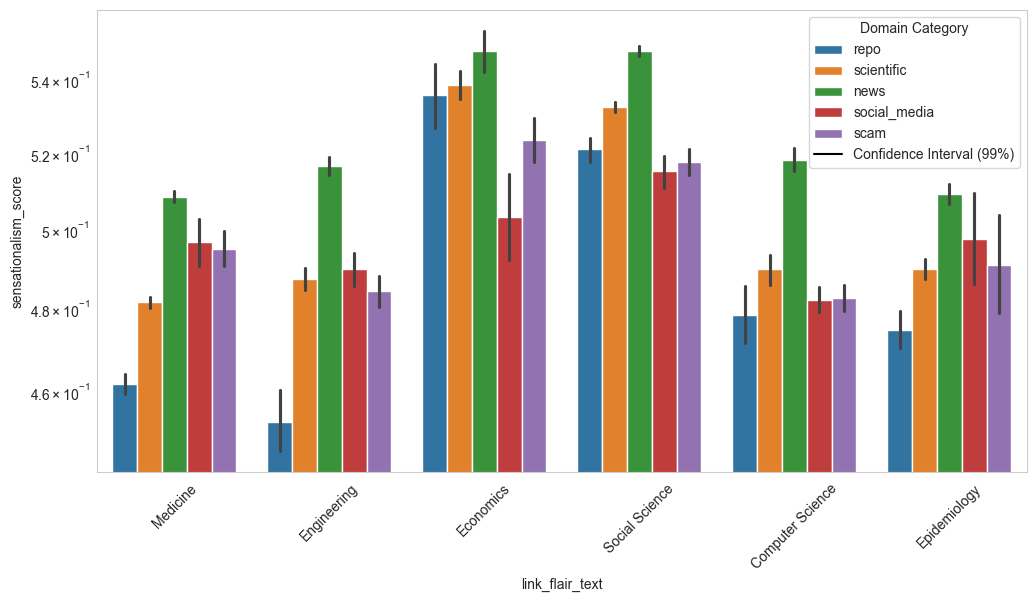

In [5]:

plt.figure(figsize=(12, 6))
sns_plot = sns.barplot(data=df[df["link_flair_text"].isin(selected_categories)], x="link_flair_text", y="sensationalism_score", hue="label_voting_manual",  hue_order=domain_order_for_hue, order=selected_categories)
plt.legend(title="Domain Category", loc="upper right", handles = sns_plot.get_legend_handles_labels()[0] + [plt.Line2D([], [], color="black", label="Confidence Interval (99%)")])
plt.xticks(rotation=45)
plt.yscale('log')
plt.show()

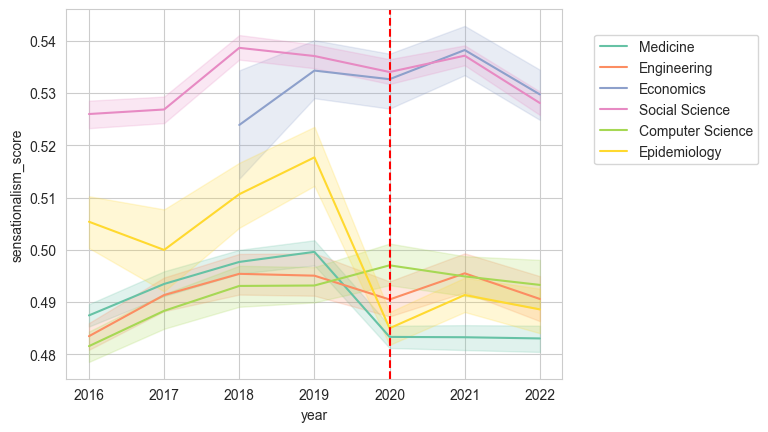

In [6]:
sns_plot = sns.lineplot(data=df, x="year", y="sensationalism_score", hue="link_flair_text", palette ="Set2", hue_order=selected_categories)
sns_plot.legend(bbox_to_anchor=(1.05, .95), loc='upper left')
plt.axvline(x=2020, color='r', linestyle='--') # COVID year


We see a clear dip in 2020 (COVID?) and a slight rise again in 2021 across the board. Especially for epidemology and medicine there is a clear dip in 2020, which makes a lot of sense considering COVID and the need for clear and accurate information that does not spread panic (assuming that sensationalism may cause more panic/stress). 

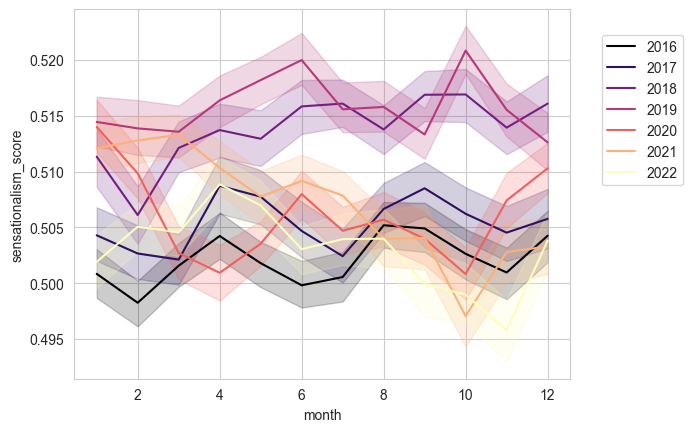

In [7]:
sns_plot = sns.lineplot(data=df, x="month", y="sensationalism_score", hue="year", palette="magma")

# place legend outside of box: https://www.statology.org/seaborn-legend-position/
sns_plot.legend(bbox_to_anchor=(1.05, .95), loc='upper left')

Too high variance in the data to see a clear trend over the months. Seems to be slightly higher for 2018 and 2019? 

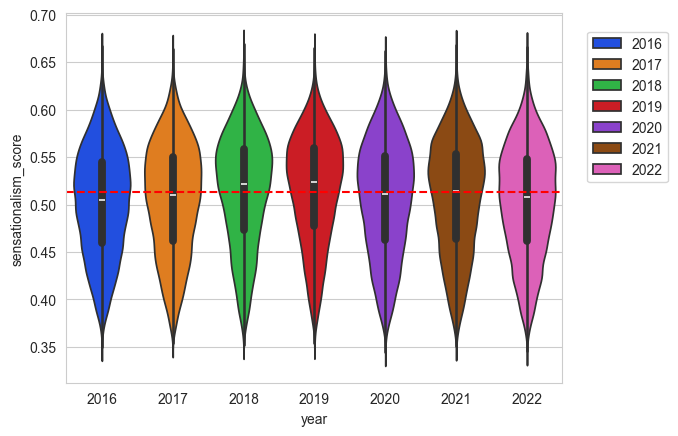

In [8]:
# Plot the distribution of sensationalism scores over the years
sns_plot = sns.violinplot(data=df, x="year", y="sensationalism_score", palette="bright", hue="year")
sns_plot.legend(bbox_to_anchor=(1.05, .95), loc='upper left', borderaxespad=0.)
plt.axhline(df["sensationalism_score"].median(), color='r', linestyle='--')


Sensationalism seems to be consistent over the years, looking how most of the posts are distributed.

# Sensationalism over different categories.

In [9]:

average_sensationalism = df.groupby("top_category")["sensationalism_score"].mean().sort_values(ascending=False)
median_sensationalism = df.groupby("top_category")["sensationalism_score"].median().sort_values(ascending=False)
median_df = pd.DataFrame({
    "top_category": median_sensationalism.index,
    "median_sensationalism": median_sensationalism.values
})


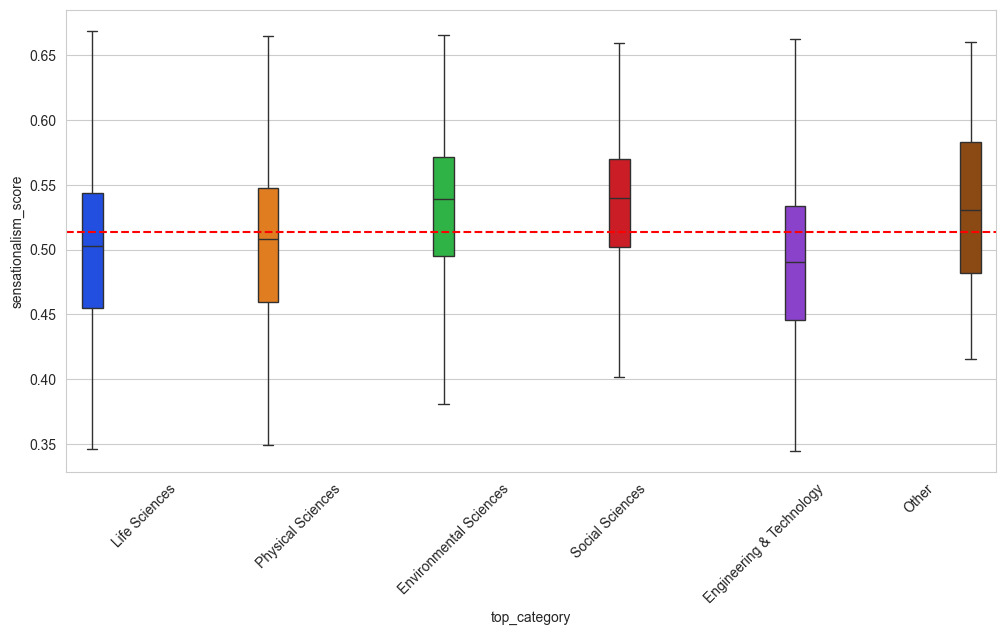

In [10]:
plt.figure(figsize=(12, 6))
sns_plot = sns.boxplot(data=df, 
                       x="top_category", 
                       y="sensationalism_score", 
                       palette="bright", 
                       hue="top_category", 
                       dodge=True, 
                        showfliers=False)
plt.xticks(rotation=45)
plt.axhline(df["sensationalism_score"].median(), color='r', linestyle='--')

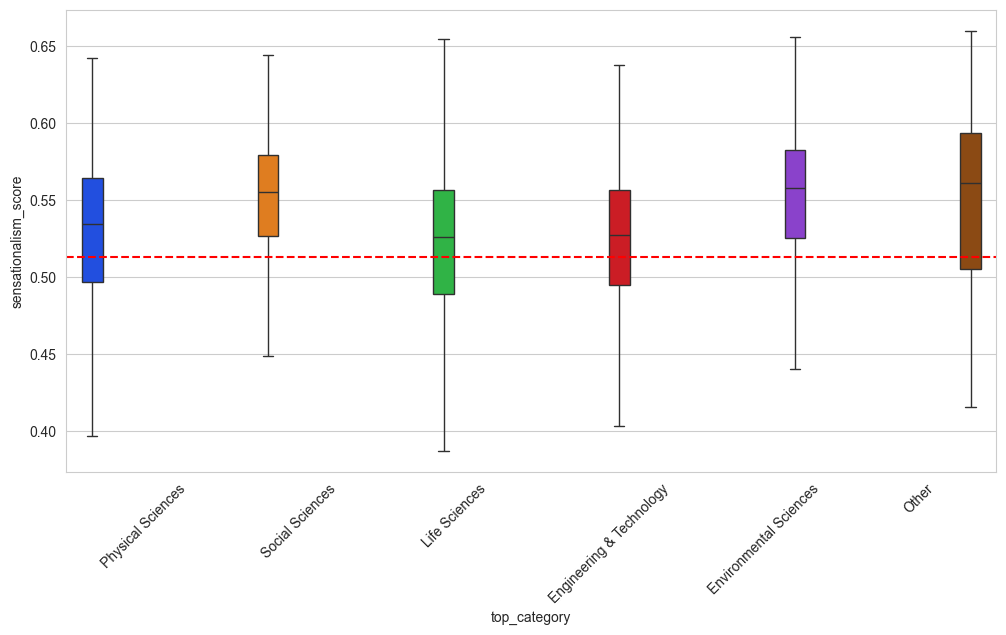

In [11]:
plt.figure(figsize=(12, 6))
sns_plot = sns.boxplot(data=df[df["score"] >= 100], 
                       x="top_category", 
                       y="sensationalism_score", 
                       palette="bright", 
                       hue="top_category", 
                       dodge=True, 
                       showfliers=False)
plt.xticks(rotation=45)
plt.axhline(df["sensationalism_score"].median(), color='r', linestyle='--')

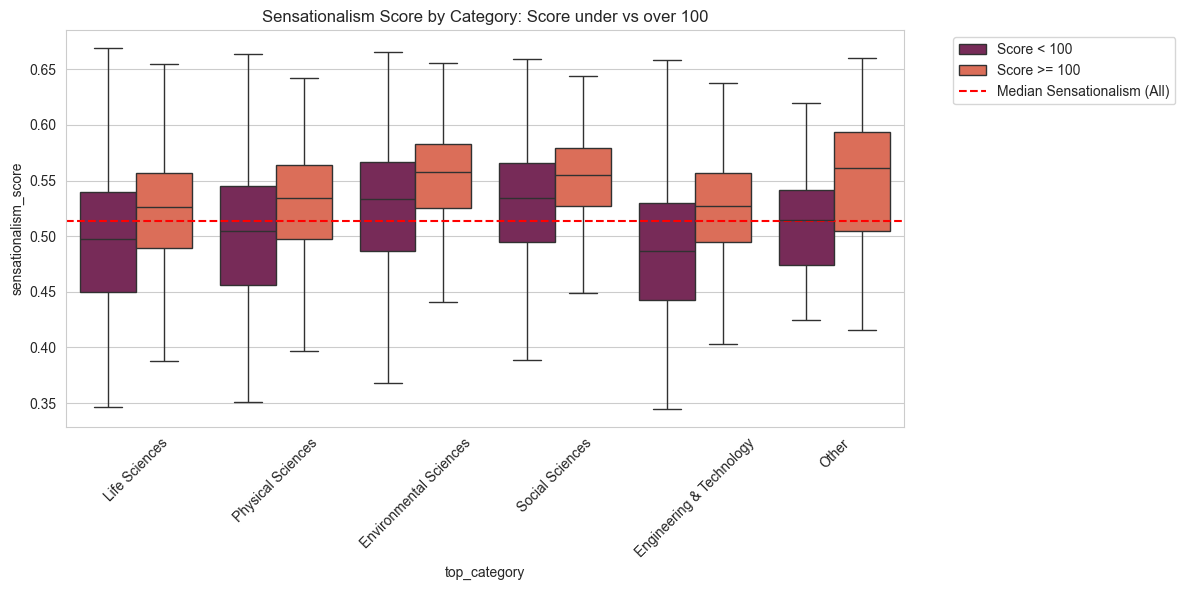

In [12]:
df_high_score = df[df["score"] >= 100].copy()
df_low_score = df[df["score"] < 100].copy()

df_high_score['dataset'] = 'Score >= 100'
df_low_score['dataset'] = 'Score < 100'

combined_df = pd.concat([df_low_score, df_high_score])

plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_df, 
            x="top_category", 
            y="sensationalism_score", 
            hue="dataset", 
            palette="rocket", 
            dodge=True, 
            showfliers=False
            )
plt.xticks(rotation=45)
plt.axhline(df["sensationalism_score"].median(), color='r', linestyle='--', label='Median Sensationalism (All)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Sensationalism Score by Category: Score under vs over 100")
plt.tight_layout()
plt.show()


Sensationalism is consistently higher for higher-scoring posts (defined as posts over 100 upvotes). This is consistent across all categories.

In [13]:
#TODO: Average sensationalism score per category (all reddit categories, not just top level categories.



# Sensationalisms correlation with score

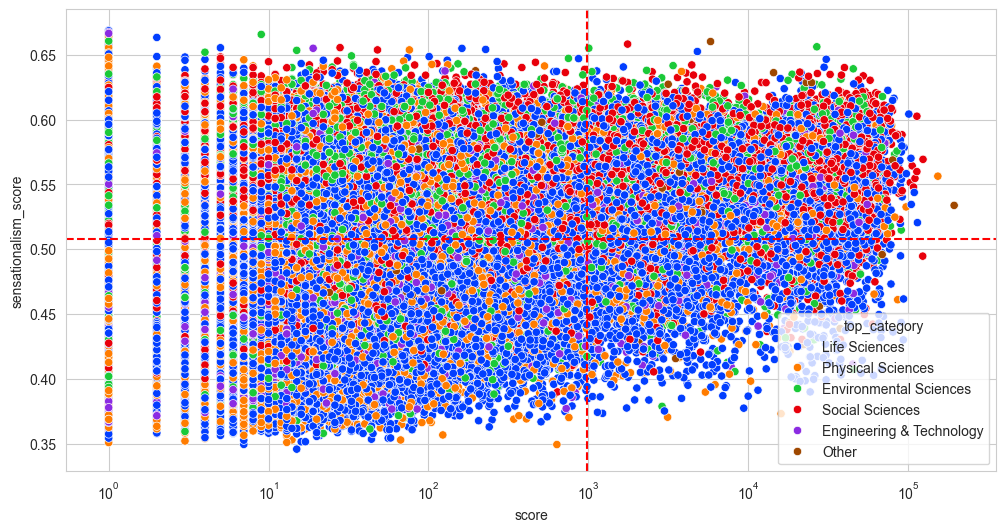

In [14]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="score", y="sensationalism_score", hue="top_category", palette="bright")
plt.axhline(df["sensationalism_score"].mean(), color='r', linestyle='--')
plt.axvline(df["score"].mean(), color='r', linestyle='--') 
plt.xscale('log')
plt.show()


Plot showing the distribution of sensationalism score over the log-scaled score of the posts. 

/var/folders/_d/kq8j6kgj4d516b1j01kslfb00000gn/T/ipykernel_66260/3189934809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,


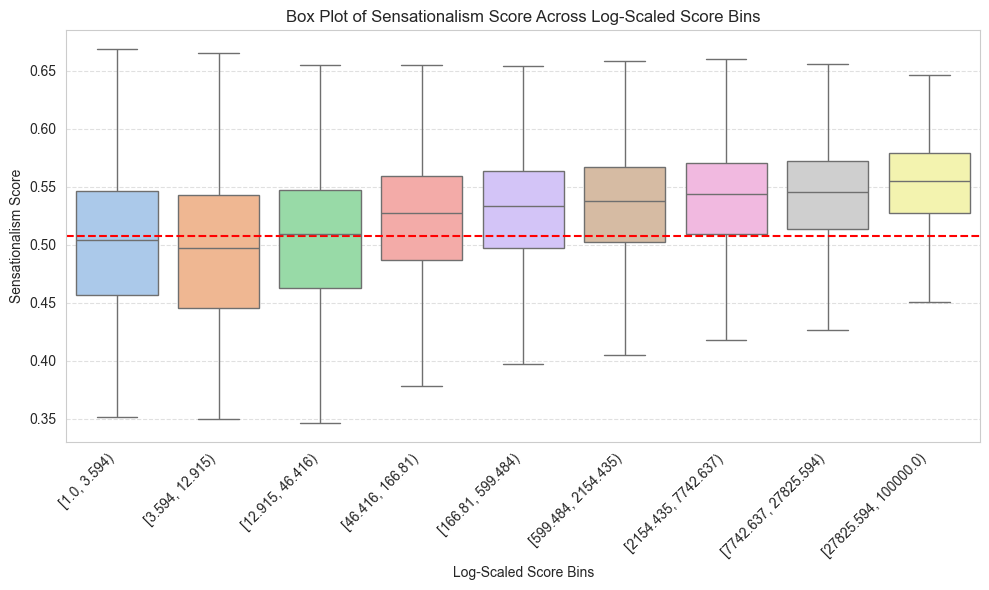

In [15]:
df['score_bin'] = pd.cut(df['score'], bins=np.logspace(0, 5, num=10), right=False)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df,
            x='score_bin', 
            y='sensationalism_score', 
            palette='pastel', 
            showfliers=False,
            # hue='top_category'
            )
plt.title('Box Plot of Sensationalism Score Across Log-Scaled Score Bins')
plt.xlabel('Log-Scaled Score Bins')
plt.ylabel('Sensationalism Score')
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.axhline(df['sensationalism_score'].mean(), color='r', linestyle='--')
plt.tight_layout()
plt.show()

The score is log-scaled to better visualize the "bracket" of score that the postts fall into, from very low on the left, to very high on the right. Each bracket is a log-scaled bin of the score. 

From reading this plot we can see that higher scores have less variance in the sensationalism score, while also having a higher average sensationalism score. 

# Linear regression 